([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Speed'),
  Text(1, 0, 'BufferCount'),
  Text(2, 0, 'DayTime'),
  Text(3, 0, 'SpeedDiff+1'),
  Text(4, 0, 'SpeedDiff-1'),
  Text(5, 0, 'Course'),
  Text(6, 0, 'CourseDiff')])

Text(0.5, 0, 'Model features')

Text(0, 0.5, 'Shap values')

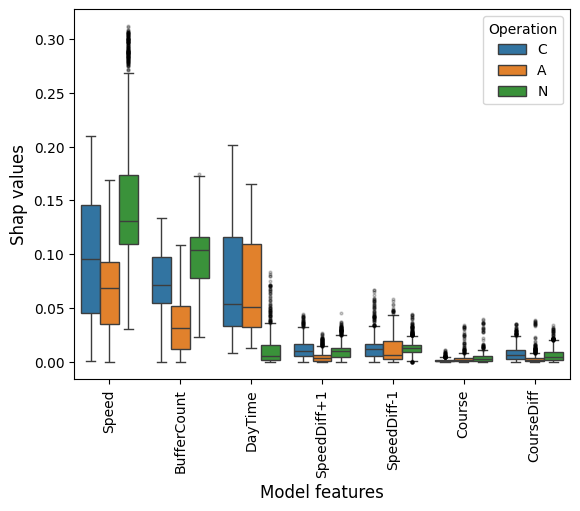

In [21]:
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#CHOOSE THE MODEL EVALUATED
modelRunning = 'binaryModel'
modelRunning = 'multiClassModel'

#1. Get fitted model
MLmodel = joblib.load('results/' + modelRunning + '/fittedModel_' + modelRunning +'.pkl')

#2. Extract shap values
x_train = pd.read_csv('data/' + modelRunning + '/x_train.csv')
explainer = shap.TreeExplainer(MLmodel.best_estimator_)
shap_values = explainer(x_train) #for categorical response variable there are two sets of shap values (660obs x 7features each). I guess one for each label(?)

beautyfullFeatureNames = ['Speed', 'Course', 'CourseDiff', 'SpeedDiff+1','SpeedDiff-1',
                 'DayTime','BufferCount']
shap_values.feature_names = beautyfullFeatureNames

#3. Transpose matrix for boxplot
if modelRunning == 'multiClassModel':
    shap0df = pd.DataFrame(data=np.abs(shap_values.values[:,:,0]),
                columns=shap_values.feature_names)
    shap1df = pd.DataFrame(data=np.abs(shap_values.values[:,:,1]),
                columns=shap_values.feature_names)
    shap2df = pd.DataFrame(data=np.abs(shap_values.values[:,:,2]),
                columns=shap_values.feature_names)
    shapDfDict = {'C':shap1df,'A':shap0df,  'N':shap2df}
    hue_order_plot = ['C', 'A', 'N'] #I define this variable here to reduce code afterwards
    

if modelRunning == 'binaryModel':
    shap0df = pd.DataFrame(data=np.abs(shap_values.values[:,:,0]),
                columns=shap_values.feature_names)
    shap1df = pd.DataFrame(data=np.abs(shap_values.values[:,:,1]),
                columns=shap_values.feature_names)
    shapDfDict = {'AN':shap0df, 'C':shap1df}
    hue_order_plot = ['C', 'AN'] #I define this variable here to reduce code afterwards

transposedShap = {}
for shapDf in shapDfDict:
    df_dict = {}
    for feature in shap_values.feature_names:
        shapDfDict[shapDf]['Operation'] = shapDf
        shapDfDict[shapDf]['Feature'] = 'holi'
        df = shapDfDict[shapDf][[feature, 'Feature', 'Operation']].copy()
        df['Feature'] = feature
        df = df.rename(columns={feature:'Shap'})
        #add variable value for scatterplots?
        df_dict[feature] = df
    transposedShap[shapDf] = pd.concat(df_dict.values())
shapFinalDF = pd.concat(transposedShap.values())

#4. Boxplot
ax = sns.boxplot(data=shapFinalDF, x='Feature', y='Shap', hue='Operation',
            order=['Speed', 'BufferCount', 'DayTime', 'SpeedDiff+1', 'SpeedDiff-1', 
                    'Course', 'CourseDiff'],
            hue_order=hue_order_plot,
            flierprops = dict(markersize=2, alpha=0.2, markerfacecolor='black', markeredgecolor=None)
            )
plt.xticks(rotation=90)
ax.set_xlabel("Model features",fontsize=12)
ax.set_ylabel("Shap values",fontsize=12)
plt.savefig('results/' + modelRunning + '/shapValues/shapBoxplot.png', bbox_inches='tight')

'Speed'

<Axes: xlabel='Speed', ylabel='shapValue'>

<Axes: xlabel='Speed', ylabel='shapValue'>

<Axes: xlabel='Speed', ylabel='shapValue'>

<Axes: xlabel='Speed', ylabel='shapValue'>

Text(0, 0.5, 'Shap values')

'BufferCount'

<Axes: xlabel='BufferCount', ylabel='shapValue'>

<Axes: xlabel='BufferCount', ylabel='shapValue'>

<Axes: xlabel='BufferCount', ylabel='shapValue'>

<Axes: xlabel='BufferCount', ylabel='shapValue'>

Text(0, 0.5, 'Shap values')

'DayTime'

<Axes: xlabel='DayTime', ylabel='shapValue'>

<Axes: xlabel='DayTime', ylabel='shapValue'>

<Axes: xlabel='DayTime', ylabel='shapValue'>

<Axes: xlabel='DayTime', ylabel='shapValue'>

Text(0, 0.5, 'Shap values')

(990,)

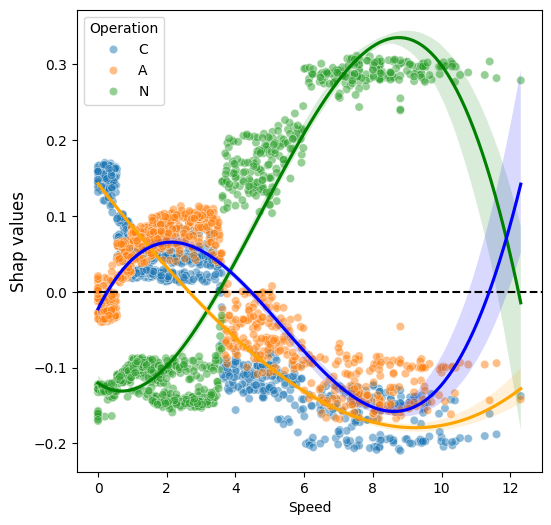

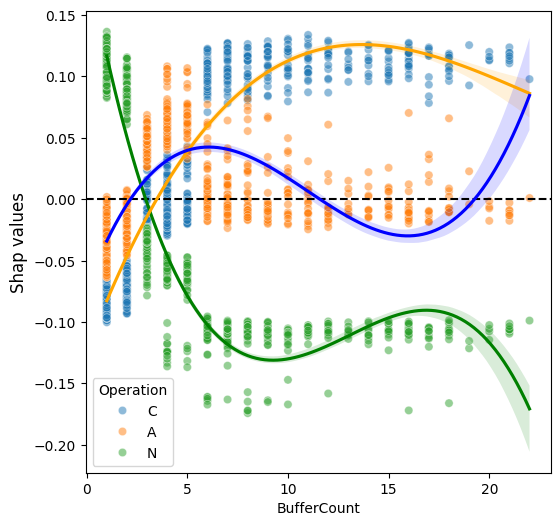

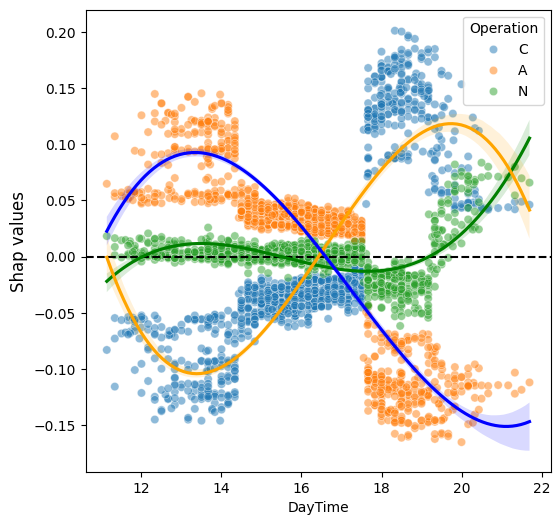

In [20]:
#5. Scatterplots
features = ['Speed', 'BufferCount', 'DayTime']
if modelRunning == 'binaryModel':
    for feature in features:
        feature
        shapAN = shap_values[:,feature,0].values
        ANdata = shap_values[:,feature,0].data
        shapC = shap_values[:,feature,1].values
        Cdata = shap_values[:,feature,1].data

        shapScatterDF = pd.concat([pd.DataFrame({'VessOp':'C', 'shapValue':shapC, feature:Cdata}),
                                   pd.DataFrame({'VessOp':'AN', 'shapValue':shapAN, feature:ANdata})])
        if feature == 'DayTime':
            shapScatterDF['DayTime'] = shapScatterDF['DayTime']-12
        fig, ax = plt.subplots(figsize=(6,6))
        sns.scatterplot(shapScatterDF, x=feature, y='shapValue', hue='VessOp', alpha=0.5)
        plt.axhline(y=0, linestyle='--', color='black')
        plt.legend(title='Operation')
        sns.regplot(shapScatterDF.loc[shapScatterDF['VessOp'] =='AN'], x=feature, y='shapValue', order=3, line_kws=dict(color="orange"), scatter=False)
        sns.regplot(shapScatterDF.loc[shapScatterDF['VessOp'] =='C'], x=feature, y='shapValue', order=3, line_kws=dict(color="blue"), scatter=False)
        ax.set_ylabel("Shap values",fontsize=12)
        fig.savefig('results/'+ modelRunning + '/shapValues/scatterplot_' + feature + '.png', bbox_inches='tight')
        
        
if modelRunning == 'multiClassModel':
    for feature in features:
        feature
        shapA = shap_values[:,feature,0].values
        Adata = shap_values[:,feature,0].data
        shapC = shap_values[:,feature,1].values
        Cdata = shap_values[:,feature,1].data
        shapN = shap_values[:,feature,2].values
        Ndata = shap_values[:,feature,2].data

        shapScatterDF = pd.concat([pd.DataFrame({'VessOp':'C', 'shapValue':shapC, feature:Cdata}),
                                   pd.DataFrame({'VessOp':'A', 'shapValue':shapA, feature:Adata}),
                                   pd.DataFrame({'VessOp':'N', 'shapValue':shapN, feature:Ndata})])
        if feature == 'DayTime2':
            shapScatterDF['DayTime2'] = shapScatterDF['DayTime2']-12
        fig, ax = plt.subplots(figsize=(6,6))
        sns.scatterplot(shapScatterDF, x=feature, y='shapValue', hue='VessOp', alpha=0.5)
        plt.axhline(y=0, linestyle='--', color='black')
        plt.legend(title='Operation')
        sns.regplot(shapScatterDF.loc[shapScatterDF['VessOp'] =='N'], x=feature, y='shapValue', order=3, line_kws=dict(color="green"), scatter=False)
        sns.regplot(shapScatterDF.loc[shapScatterDF['VessOp'] =='C'], x=feature, y='shapValue', order=3, line_kws=dict(color="orange"), scatter=False)
        sns.regplot(shapScatterDF.loc[shapScatterDF['VessOp'] =='A'], x=feature, y='shapValue', order=3, line_kws=dict(color="blue"), scatter=False)
        ax.set_ylabel("Shap values",fontsize=12)
        fig.savefig('results/'+ modelRunning + '/shapValues/scatterplot_' + feature + '.png', bbox_inches='tight')

np.shape(shap_values[:,'Speed',0])
